0.010000000000000092
-0.5509726584668609
-0.3487138754016059
-0.21565248937569115
-0.06756226416293848
0.07114622644935181
0.19552042802043473
0.30330456349207346
0.3950313751036347
0.47244156128491244
0.5376414395091277
0.5926567572050728
0.6392546101197023
0.6789048088582564
0.712802834409113
0.7419131010503308
0.7670136553501532
0.7887351603974565
0.8075924703374233
0.8240093089937911
0.8383372530781108
0.8508702672877794
0.8618558601020843
0.8715037038115463
0.8799923577511135
0.8874745687691235
0.8940814973393644
0.8999261248587022
0.9051060300795855
0.9097056737647183
0.9137982953741233
0.9174475000589442
0.9207085956512555
0.9236297257108538
0.9262528346053183
0.928614493060291
0.9307466069178513
0.9326770274827377
0.9344300784640036
0.9360270118795977
0.9374864032005519
0.938824494337324
0.9400554917163398
0.9411918255882471
0.9422443757973734
0.9432226684841554
0.9441350475581956
0.9449888242455758
0.9457904075617574
0.9465454181764673
0.9472587878079535
0.9479348460017482
0.9

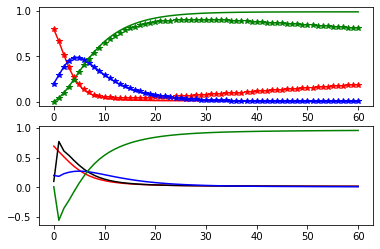

In [13]:
#trying 4th order Runge-Kutta method for SIR model
#author: Elaine Gorom

#----------SIR without demography---------

#susceptible ode for SIR without demography
def dsdt(t,s,i):
    return(-beta*s*i)

#infected ode for SIR without demography
def didt(t,s,i):
    return(beta*s*i-gamma*i)

#omitting function for recovered ode since it's not necessary to solve this system of odes

#main function for 4th order Runge-Kutta for SIR model
def RK4SIR(n,beta, gamma,s0,i0,r0,dt):
    #initialize the arrays for solutions
    S=[s0]+[0]*n
    I=[i0]+[0]*n
    R=[r0]+[0]*n
   #need to add in a break if s0+i0+r0/=1

    #calculate each step using RK4
    for i in range(0,n):
        Si=S[i]
        Ii=I[i]

        sk1=dsdt(i,Si,Ii)
        ik1=didt(i,Si,Ii)
        

        sk2=dsdt(i+dt/2,Si+dt/2*sk1,Ii+dt/2*ik1)
        ik2=didt(i+dt/2,Si+dt/2*sk1,Ii+dt/2*ik1)

        sk3=dsdt(i+dt/2,Si+dt/2*sk2,Ii+dt/2*ik2)
        ik3=didt(i+dt/2,Si+dt/2*sk2,Ii+dt/2*ik2)

        sk4=dsdt(i+dt,Si+dt*sk3,Ii+dt*ik3)
        ik4=didt(i+dt,Si+dt*sk3,Ii+dt*ik3)

        S[i+1]=Si+dt/6*(sk1+2*sk2+2*sk3+sk4)
        I[i+1]=Ii+dt/6*(ik1+2*ik2+2*ik3+ik4)

    #caculate recovered array
    for i in range(len(R)):
        R[i]=1-I[i]-S[i]

    return S,I,R


n=60
beta=1.5
gamma=1/3
s0=.8
i0=.2
r0=0
dt=.5

s,i,r=RK4SIR(n,beta,gamma,s0,i0,r0,dt)

import numpy as np
import math
import matplotlib.pyplot as plt

t=list(range(0,n+1))
plt.figure
plt.subplot(211)
plt.plot(t,s,'r')
plt.plot(t,i,'b')
plt.plot(t,r,'g')
plt.show

#----------------SIR with demography------------

# Susceptible function for with demography
def dsddt(t,s,i):
    return(mu-beta*s*i-mu*s)

#infected function for with demography
def diddt(t,s,i):
    return(beta*s*i-gamma*i-mu*i)

#main function for 4th order Runge-Kutta for SIR model
def RK4SIRdemog(n,beta, gamma,mu,s0,i0,r0,dt):
    #initialize the arrays for solutions
    S=[s0]+[0]*n
    I=[i0]+[0]*n
    R=[r0]+[0]*n
   #need to add in a break if s0+i0+r0/=1

    #calculate each step using RK4
    for i in range(0,n):
        Si=S[i]
        Ii=I[i]

        sk1=dsddt(i,Si,Ii)
        ik1=diddt(i,Si,Ii)
        

        sk2=dsddt(i+dt/2,Si+dt/2*sk1,Ii+dt/2*ik1)
        ik2=diddt(i+dt/2,Si+dt/2*sk1,Ii+dt/2*ik1)

        sk3=dsddt(i+dt/2,Si+dt/2*sk2,Ii+dt/2*ik2)
        ik3=diddt(i+dt/2,Si+dt/2*sk2,Ii+dt/2*ik2)

        sk4=dsddt(i+dt,Si+dt*sk3,Ii+dt*ik3)
        ik4=diddt(i+dt,Si+dt*sk3,Ii+dt*ik3)

        S[i+1]=Si+dt/6*(sk1+2*sk2+2*sk3+sk4)
        I[i+1]=Ii+dt/6*(ik1+2*ik2+2*ik3+ik4)

    #caculate recovered array
    for i in range(len(R)):
        R[i]=1-I[i]-S[i]

    return S,I,R


mu=.01

s,i,r=RK4SIRdemog(n,beta,gamma,mu, s0,i0,r0,dt)
plt.figure(1)
plt.plot(t,s,'r*')
plt.plot(t,i,'b*')
plt.plot(t,r,'g*')
plt.show


#---------------SEIR without demography--------------
#susceptible function with latent period
def dsedt(t,s,e,i):
    return(-beta*s*i)

#exposed function with latent period
def deedt(t,s,e,i):
    return(beta*s*i-sigma*e)

#infected function with latent period
def diedt(t,s,e,i):
    return(sigma*e-gamma*i)

def RK4SEIR(n, beta, gamma, sigma, s0,e0, i0,r0,dt):
    #initialize the arrays for solutions
    S=[s0]+[0]*n
    E=[e0]+[0]*n
    I=[i0]+[0]*n
    R=[r0]+[0]*n
    
    #calculate each step using RK4
    for i in range(0,n):
        Si=S[i]
        Ei=E[i]
        Ii=I[i]

        sk1=dsedt(i,Si,Ei,Ii)
        ek1=deedt(i,Si,Ei,Ii)
        ik1=diedt(i,Si,Ei,Ii)
        

        sk2=dsedt(i+dt/2,Si+dt/2*sk1,Ei+dt/2*ek1,Ii+dt/2*ik1)
        ek2=deedt(i+dt/2,Si+dt/2*sk1,Ei+dt/2*ek1,Ii+dt/2*ik1)
        ik2=diedt(i+dt/2,Si+dt/2*sk1,Ei+dt/2*ek1,Ii+dt/2*ik1)

        sk3=dsedt(i+dt/2,Si+dt/2*sk2,Ei+dt/2*ek2,Ii+dt/2*ik2)
        ek3=deedt(i+dt/2,Si+dt/2*sk2,Ei+dt/2*ek2,Ii+dt/2*ik2)
        ik3=diedt(i+dt/2,Si+dt/2*sk2,Ei+dt/2*ek2,Ii+dt/2*ik2)

        sk4=dsedt(i+dt,Si+dt*sk3,Ei+dt*ek3,Ii+dt*ik3)
        ek4=deedt(i+dt,Si+dt*sk3,Ei+dt*ek3,Ii+dt*ik3)
        ik4=diedt(i+dt,Si+dt*sk3,Ei+dt*ek3,Ii+dt*ik3)

        S[i+1]=Si+dt/6*(sk1+2*sk2+2*sk3+sk4)
        E[i+1]=Si+dt/6*(ek1+2*ek2+2*ek3+ek4)
        I[i+1]=Ii+dt/6*(ik1+2*ik2+2*ik3+ik4)

    #caculate recovered array
    for i in range(len(R)):
        R[i]=1-I[i]-S[i]-E[i]
        print(R[i])

    return S,E,I,R
    
    
sigma=1/5.1
gamma=1/3.3
beta=1.5
e0=.1
i0=.2
r0=0.01
s0=1-e0-r0-i0

s,e,i,r=RK4SEIR(n,beta,gamma,sigma,s0,e0,i0,r0,dt)
plt.subplot(212)
plt.plot(t,s,'r')
plt.plot(t,e,'k')
plt.plot(t,i,'b')
plt.plot(t,r,'g')
#-------------SEIR with demography----------------


#susceptible function with latent period and demography
def dseddt(t,s,i,e):
    return(mu-(beta*i+mu)*s)

#exposed function with latent period and demography
def deeddt(t,s,i,e):
    return(beta*s*i-(mu+sigma)*e)

#infecte function with latent period and demography
def dieddt(t,s,i,e):
    return(sigma*e-(mu+gamma)*i)

  



    


In [18]:
from tkinter import Tk, Checkbutton, IntVar

class MyGUI:
    def __init__(self, window):
        self.var=IntVar()
        self.c=Checkbutton(window, text='Enable Tab',
                           variable=self.var,
                           command=self.cb)
        self.c.pack()
    def cb(self):
        if self.var.get()==0:
            self.var.set(1)
        else:
            self.var.set(0)
        print('self.var is', self.var.get())
        
root=Tk()
gui=MyGUI(root)
root.mainloop()

self.var is 0
self.var is 0
self.var is 0
self.var is 0
self.var is 0
self.var is 0
self.var is 0
self.var is 0
